In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set(rc={'figure.figsize':(10,6.180)})
sns.set_style("whitegrid")

%matplotlib inline



In [28]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [4]:
def my_reorder(a, first):
    # move first to the top. and keep the rest
    new_order = first.copy()
    for col in a:
        if col not in first:
            new_order.append(col)
    return new_order

def read_pdb(pre, name, run=30, rerun=2):
    all_data = []
    if run == -1:
        run_list = ["native"]
    else:
        run_list = list(range(run))
    for i in run_list:
        if rerun == -1:
            rerun_list = ["rerun"]
        else:
            rerun_list = list(range(rerun))
        for j in rerun_list:
            # pre = "/Users/weilu/Research/server/nov_2018/iterative_optimization_4/all_simulations/"
            location = pre + f"{name}/simulation/{i}/{j}/"
            try:
                wham = pd.read_csv(location+"wham.dat")
            except:
                print(f"PDB: {name}, Run: {i}, Rerun: {j} not exist")
                print(location+"wham.dat")
                continue
            wham.columns = wham.columns.str.strip()
            remove_columns = ['Tc', 'Energy']
            wham = wham.drop(remove_columns, axis=1)
            energy = pd.read_csv(location+"energy.dat")
            energy.columns = energy.columns.str.strip()
            remove_columns = ['Steps', 'Shake', 'Excluded', 'Helix', 'AMH-Go', 'Vec_FM', 'SSB']
            energy = energy.drop(remove_columns, axis=1)
            data = pd.concat([wham, energy], axis=1).assign(Repeat=i, Run=j)
            all_data.append(data)
    data = pd.concat(all_data).reset_index(drop=True)
    data = data.reindex(columns=my_reorder(data.columns, ["Steps", "Qw", "VTotal", "Run", "Repeat"]))
    print(name, len(data))
    return data

In [5]:
dataset = {"old":"1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "),
            "new":"1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "),
            "test":["t089", "t120", "t251", "top7", "1ubq", "t0766", "t0778", "t0782", "t0792", "t0803", "t0815", "t0833", "t0842", "t0844"]}
dataset["combined"] = dataset["old"] + dataset["new"]

def get_complete_data(pre, folder_list, pdb_list, formatName=True, **kwargs):
    complete_all_data = []
    for folder in folder_list:
        # pre = "/Users/weilu/Research/server/april_2019/iterative_optimization_old_set/"
        pre_folder = f"{pre}{folder}/"
        all_data = []
        for p in pdb_list:
            if formatName:
                name = p.lower()[:4]
            else:
                name = p
            tmp = read_pdb(pre_folder, name, **kwargs)
            all_data.append(tmp.assign(Name=name))
        data = pd.concat(all_data)
        complete_all_data.append(data.assign(Folder=folder))
    data = pd.concat(complete_all_data)
    data = data.reindex(columns=my_reorder(data.columns, ["Name", "Folder"]))
    return data



In [72]:
pre = "/Users/weilu/Research/server/may_2019/single_memory/"
# folder_list = ["multi_iter0", "original"]
folder_list = ["original", "multi_iter0", "multi_iter0_A_norm"]
# pdb_list = ['T0759-D1', 'T0953s2-D1', 'T0943-D1', 'T0773-D1', 'T0816-D1', 'T0854-D2', 'T0767-D1', 'T0853-D1', 'T0958-D1', 'T0834-D2', 'T0960-D3', 'T0862-D1', 'T0912-D3', 'T0898-D1', 'T0824-D1', 'T0782-D1', 'T0830-D2', 'T0761-D2', 'T0968s1-D1', 'T0870-D1', 'T0838-D1', 'T0803-D1']
pdb_list = dataset["combined"]
# data = get_complete_data(pre, folder_list, pdb_list, run=30, rerun=-1, formatName=True)
data = get_complete_data(pre, folder_list, pdb_list, run=2, rerun=1, formatName=True)
data.Steps = data.Steps.astype(int)
data["Contact"] = data["Water"] + data["Burial"]
subset_data = data.query("Steps % 80000 == 0 and Steps != 0")


1r69 2000
1utg 2000
3icb 2000
256b 2000
4cpv 2000
1ccr 1936
2mhr 1757
1mba 1084
2fha 838
1fc2 4000
1enh 4000
2gb1 4000
2cro 4000
1ctf 4000
4icb 3847
1r69 2000
1utg 2000
3icb 2000
256b 2000
4cpv 1988
1ccr 1984
2mhr 2000
1mba 1451
2fha 1153
1fc2 4000
1enh 4000
2gb1 4000
2cro 4000
1ctf 4000
4icb 4000
1r69 2000
1utg 2000
3icb 2000
256b 1870
4cpv 1564
1ccr 1686
2mhr 1353
1mba 878
2fha 701
1fc2 4000
1enh 4000
2gb1 4000
2cro 4000
1ctf 3483
4icb 2185


In [82]:
subset_data.tail()

,Name,Folder,Steps,Qw,VTotal,Run,Repeat,Rg,Chain,Chi,Rama,DSSP,P_AP,Water,Burial,Frag_Mem,Membrane,Ebond,Epair,Contact
2102,4icb,multi_iter0_A_norm,3440000,0.299221,-2351.716349,0,1,10.138270,125.513145,45.989140,-109.786021,-0.000211,-20.697701,-1756.263692,-567.400796,-69.070213,0,133.747191,54.494619,-2323.664488
2122,4icb,multi_iter0_A_norm,3520000,0.296701,-2358.375037,0,1,10.270210,115.661917,36.400212,-123.933548,-0.001669,-12.432176,-1735.323318,-568.839413,-69.907043,0,173.755575,42.322578,-2304.162731
2142,4icb,multi_iter0_A_norm,3600000,0.299320,-2396.800803,0,1,10.125611,123.474687,33.003273,-135.979776,-0.002449,-16.302768,-1761.073415,-567.073925,-72.846430,0,126.173661,65.757941,-2328.147340
2162,4icb,multi_iter0_A_norm,3680000,0.302213,-2330.168227,0,1,10.199156,136.547283,40.461851,-115.554970,-0.004457,-16.082120,-1734.028468,-571.503530,-70.003817,0,149.088870,47.300652,-2305.531998
2182,4icb,multi_iter0_A_norm,3760000,0.302883,-2384.598997,0,1,10.141066,130.201009,38.524781,-131.362964,-0.000848,-17.658070,-1760.291760,-571.568019,-72.443126,0,143.064456,51.377539,-2331.859779


In [84]:
a = subset_data.query("Folder != 'multi_iter0_A_norm'")

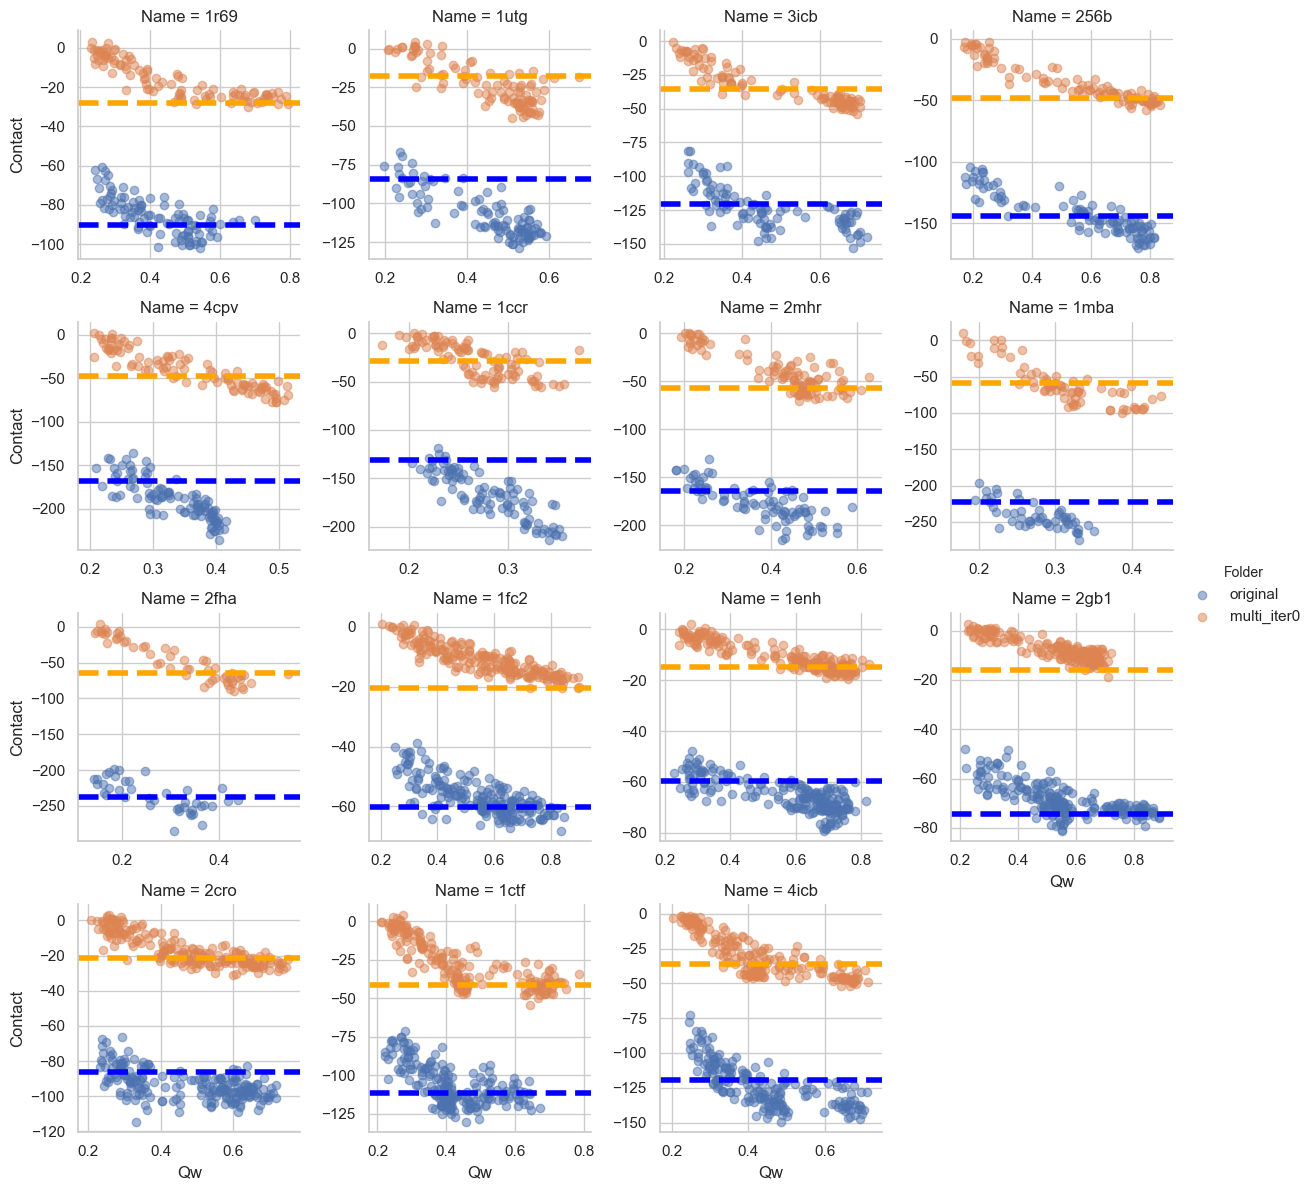

In [85]:
y_show = "Contact"
g = sns.FacetGrid(a, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Qw", y_show, alpha=0.5).add_legend())
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'multi_iter0_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="blue", linewidth=4)
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'original_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="orange", linewidth=4)
for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
    # print(name)
    energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[0]
    ax.axhline(energy, ls="--", color="blue", linewidth=4)
    energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[1]
    ax.axhline(energy, ls="--", color="orange", linewidth=4)

In [40]:
data.to_csv("/Users/weilu/Research/data/optimization/may08.csv")

In [41]:
last_frame = data.groupby(["Name", "Repeat", "Folder"]).tail(1)

In [55]:
def do(cmd):
    return subprocess.Popen(cmd, shell=True).wait()

In [51]:
import subprocess

In [57]:
for i, line in last_frame.iterrows():
    frame = int(int(line["Steps"]) / 4000)
    folder = line["Folder"]
    name = line["Name"]
    repeat = int(line["Repeat"])
    source = f"/Users/weilu/Research/server/may_2019/database/{folder}_{name}_{repeat}/frame{frame}.pdb"
    pre = "/Users/weilu/Research/server/may_2019/single_memory/chosen_structures/"
    do(f"mkdir -p {pre}{name}")
    target = f"{pre}{name}/{folder}_{repeat}.pdb"
    a = do(f"cp {source} {target}")
    # print(a)
    # print(frame, line)
    # break

In [61]:
name_list = [a.lower()[:4] for a in pdb_list]

In [69]:
name = name_list[0]
for name in name_list:
    out_file = f'''
load cleaned_pdbs/{name}.pdb
load {name}/original_0.pdb
load {name}/multi_iter0_0.pdb
alignto {name},
orient
util.color_deep("gray80", '{name}', 0)
util.color_deep("green", 'original_0', 0)
util.color_deep("red", 'multi_iter0_0', 0)
'''
    with open(f"/Users/weilu/Research/server/may_2019/single_memory/chosen_structures/{name}.pml", "w") as out:
        out.write(out_file)
    

In [25]:
subset_data = subset_data.query("Steps % 80000 == 0 and Steps != 0")

In [30]:
subset_data.head()

,Name,Folder,Steps,Qw,VTotal,Run,Repeat,Rg,Chain,Chi,Rama,DSSP,P_AP,Water,Burial,Frag_Mem,Membrane,Ebond,Epair
20,1r69,original,80000,0.260807,-95.226489,rerun,0,12.152029,89.649368,22.310868,-95.028886,-5.027819e-08,-2.392265e+00,-8.481156,-52.398134,-48.886283,0,182.881847,2.415284
40,1r69,original,160000,0.289319,-153.975015,rerun,0,11.343404,80.901303,23.956897,-129.096091,-4.829285e-05,-4.281021e+00,-17.782898,-54.834392,-52.838764,0,152.662868,9.564202
60,1r69,original,240000,0.269704,-109.853812,rerun,0,11.993795,93.107580,39.120580,-120.314117,-4.341149e-08,-1.480912e-07,-12.983571,-54.297658,-54.486626,0,153.819585,6.610288
80,1r69,original,320000,0.323581,-145.143185,rerun,0,11.123848,84.775473,27.871982,-110.119621,-3.622934e-13,-9.983451e-01,-28.144780,-53.935452,-64.592443,0,161.938049,11.678037
100,1r69,original,400000,0.283331,-135.358589,rerun,0,11.343645,95.362166,19.067645,-105.841878,-2.887054e-07,-4.868810e+00,-22.096093,-53.450463,-63.531155,0,165.933341,4.365326


In [31]:
subset_data["Contact"] = subset_data["Water"] + subset_data["Burial"]

In [21]:
data = get_complete_data(pre, folder_list, pdb_list, run=-1, rerun=-1, formatName=True)
data.Steps = data.Steps.astype(int)
data["Contact"] = data["Water"] + data["Burial"]
native = data



1r69 26
1utg 26
3icb 26
256b 26
4cpv 26
1ccr 26
2mhr 26
1mba 26
2fha 26
1fc2 26
1enh 26
2gb1 26
2cro 26
1ctf 26
4icb 26
1r69 26
1utg 26
3icb 26
256b 26
4cpv 26
1ccr 26
2mhr 26
1mba 26
2fha 26
1fc2 26
1enh 26
2gb1 26
2cro 26
1ctf 26
4icb 26


In [7]:
subset_data.head()

,Name,Folder,Steps,Qw,VTotal,Run,Repeat,Rg,Chain,Chi,Rama,DSSP,P_AP,Water,Burial,Frag_Mem,Membrane,Ebond,Epair
0,1r69,original,0,0.005951,-189.021357,rerun,0,57.809329,3.906152,0.925549,-137.479793,0.000000e+00,0.000000e+00,0.000000,-51.827012,-4.546254,0,0.933290,0.000000
20,1r69,original,80000,0.260807,-95.226489,rerun,0,12.152029,89.649368,22.310868,-95.028886,-5.027819e-08,-2.392265e+00,-8.481156,-52.398134,-48.886283,0,182.881847,2.415284
40,1r69,original,160000,0.289319,-153.975015,rerun,0,11.343404,80.901303,23.956897,-129.096091,-4.829285e-05,-4.281021e+00,-17.782898,-54.834392,-52.838764,0,152.662868,9.564202
60,1r69,original,240000,0.269704,-109.853812,rerun,0,11.993795,93.107580,39.120580,-120.314117,-4.341149e-08,-1.480912e-07,-12.983571,-54.297658,-54.486626,0,153.819585,6.610288
80,1r69,original,320000,0.323581,-145.143185,rerun,0,11.123848,84.775473,27.871982,-110.119621,-3.622934e-13,-9.983451e-01,-28.144780,-53.935452,-64.592443,0,161.938049,11.678037


In [23]:
native_energy = native.groupby(["Name", "Folder"]).head(1)


In [11]:
prediction_energy = data.groupby(["Name", "Repeat", "Folder"]).head(1)
native_energy["Contact"] = native_energy["Water"] + native_energy["Burial"]

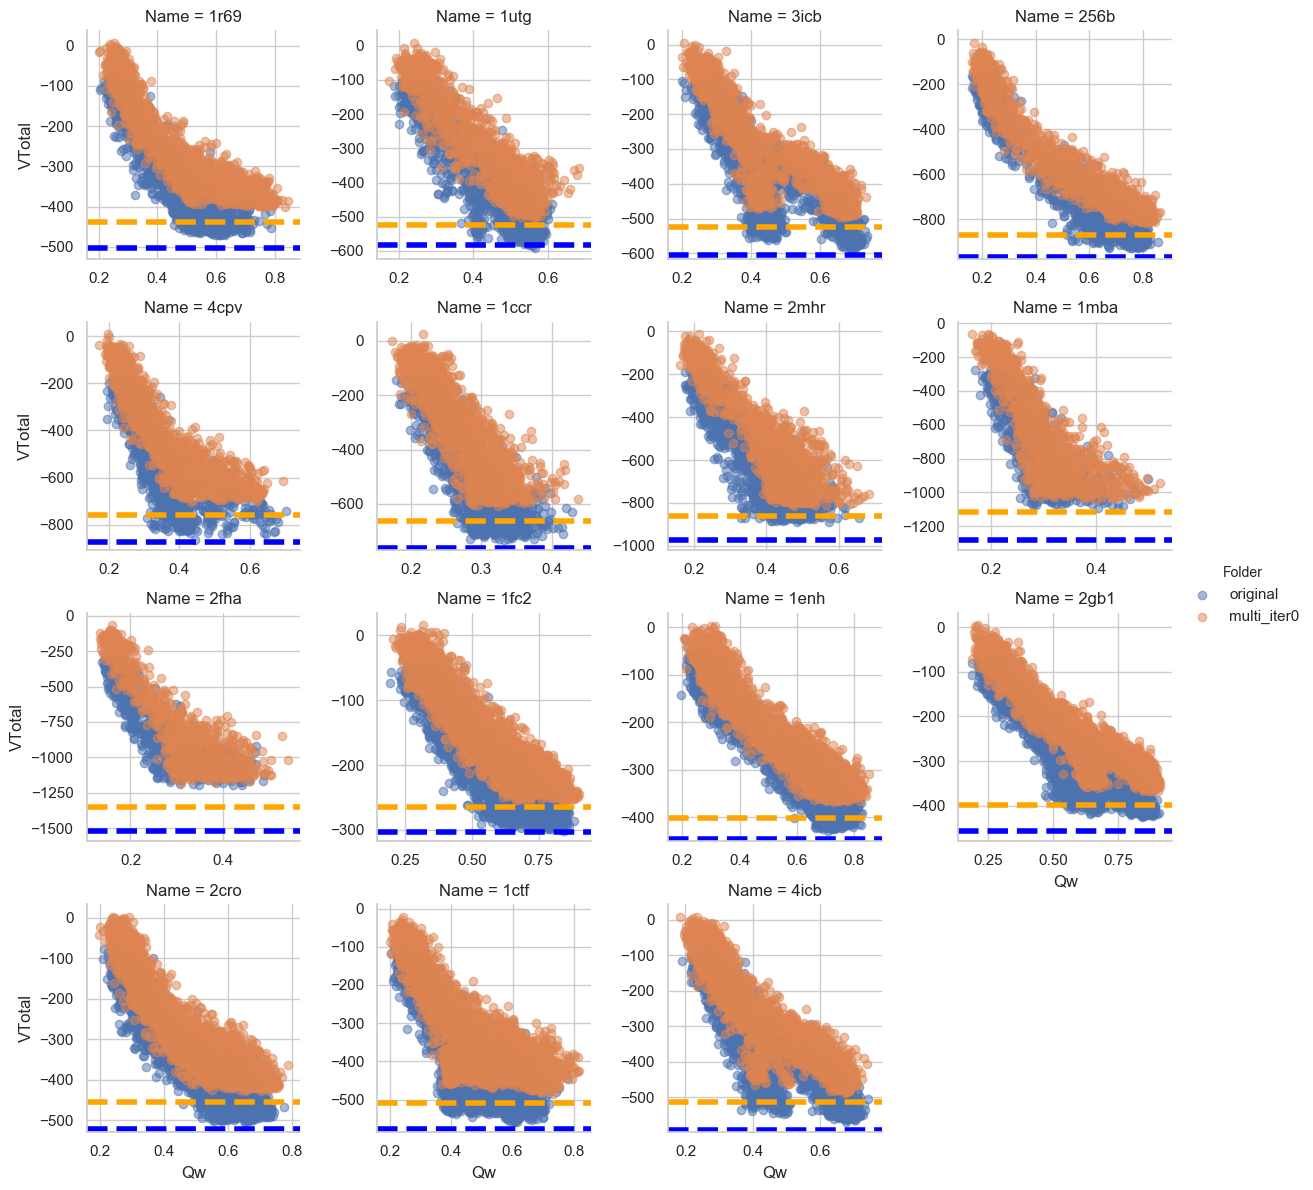

In [70]:
y_show = "VTotal"
g = sns.FacetGrid(subset_data, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Qw", y_show, alpha=0.5).add_legend())
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'multi_iter0_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="blue", linewidth=4)
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'original_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="orange", linewidth=4)
for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
    # print(name)
    energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[0]
    ax.axhline(energy, ls="--", color="blue", linewidth=4)
    energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[1]
    ax.axhline(energy, ls="--", color="orange", linewidth=4)

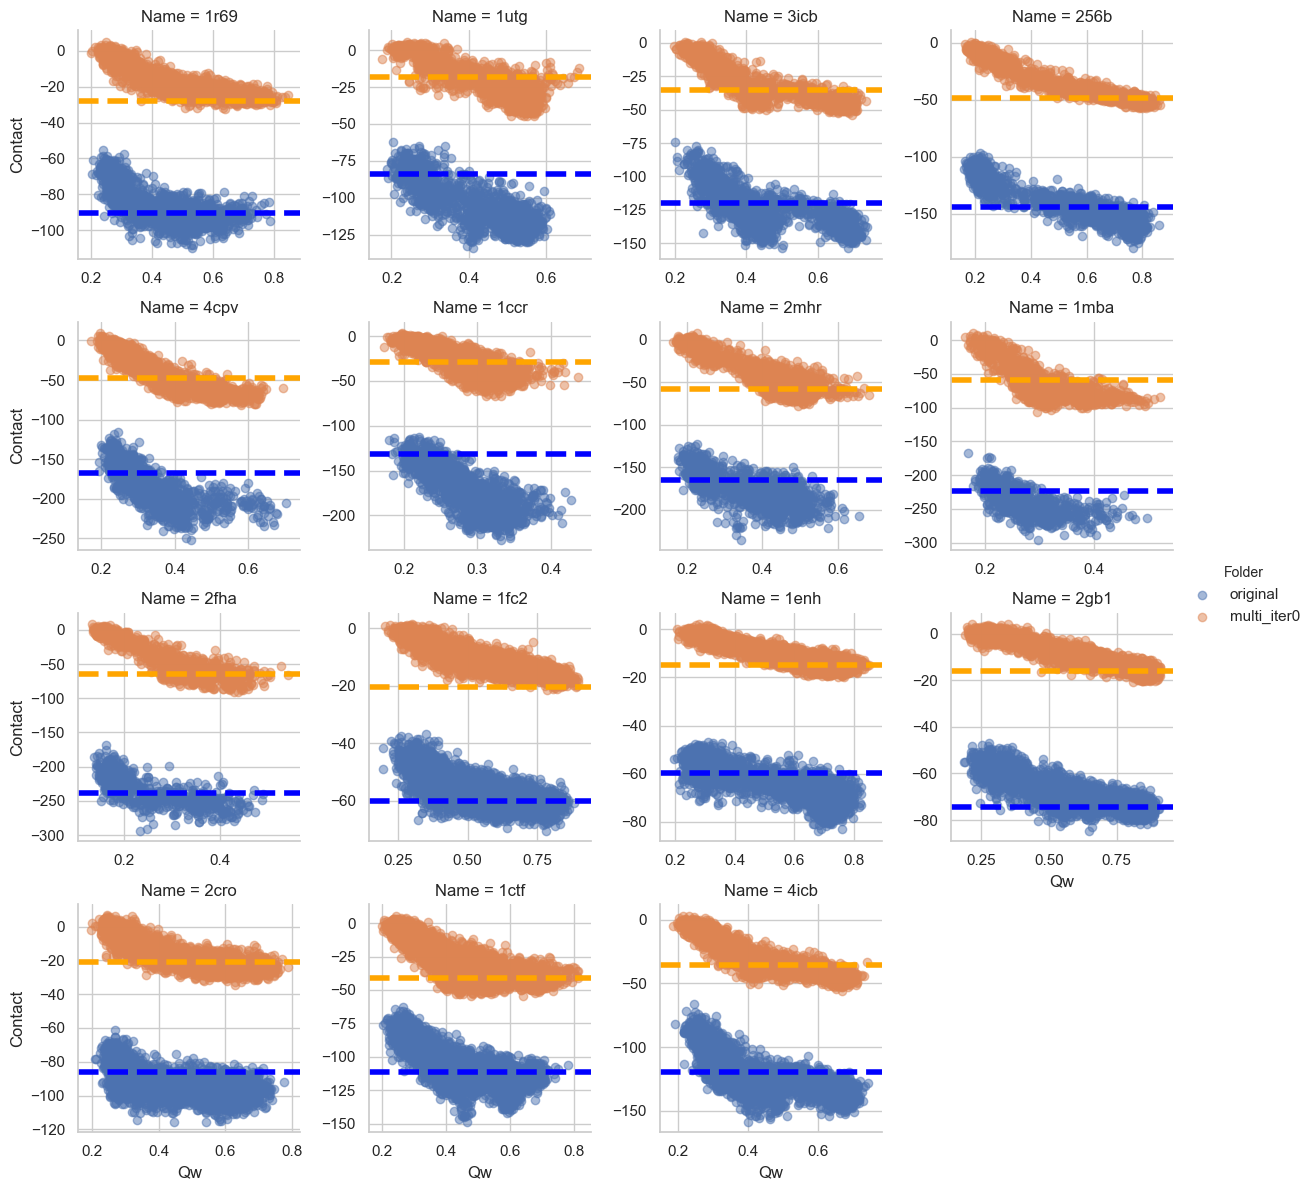

In [35]:
y_show = "Contact"
g = sns.FacetGrid(subset_data, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Qw", y_show, alpha=0.5).add_legend())
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'multi_iter0_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="blue", linewidth=4)
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'original_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="orange", linewidth=4)
for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
    # print(name)
    energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[0]
    ax.axhline(energy, ls="--", color="blue", linewidth=4)
    energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[1]
    ax.axhline(energy, ls="--", color="orange", linewidth=4)

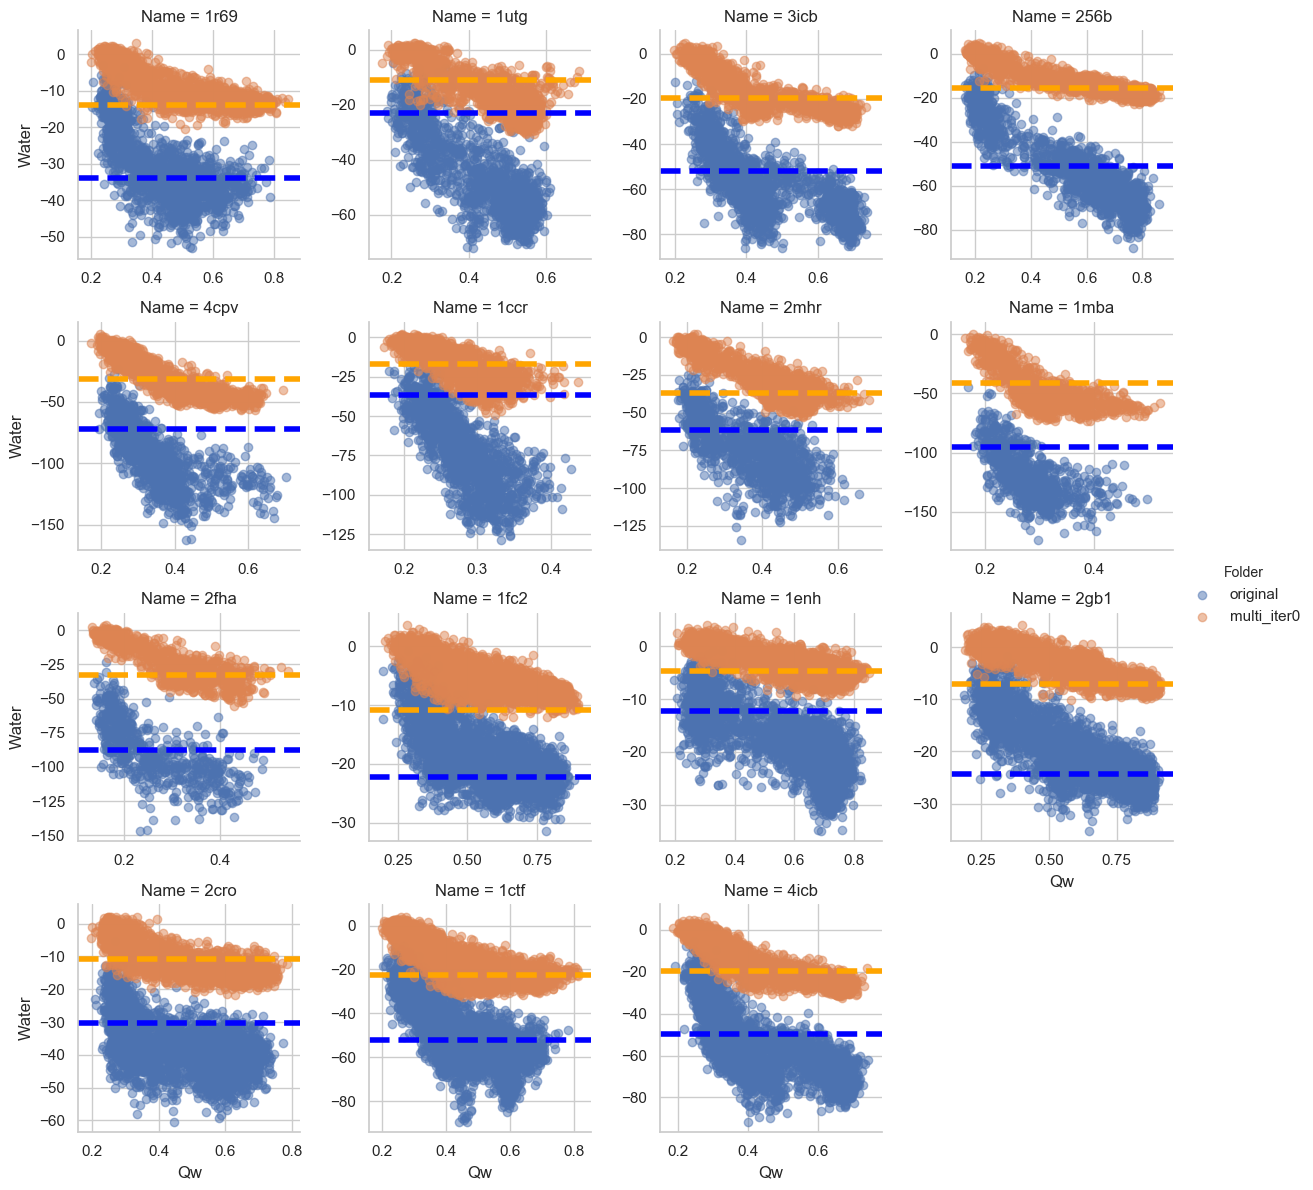

In [29]:
y_show = "Water"
g = sns.FacetGrid(subset_data, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Qw", y_show, alpha=0.5).add_legend())
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'multi_iter0_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="blue", linewidth=4)
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'original_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="orange", linewidth=4)
for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
    # print(name)
    energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[0]
    ax.axhline(energy, ls="--", color="blue", linewidth=4)
    energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[1]
    ax.axhline(energy, ls="--", color="orange", linewidth=4)

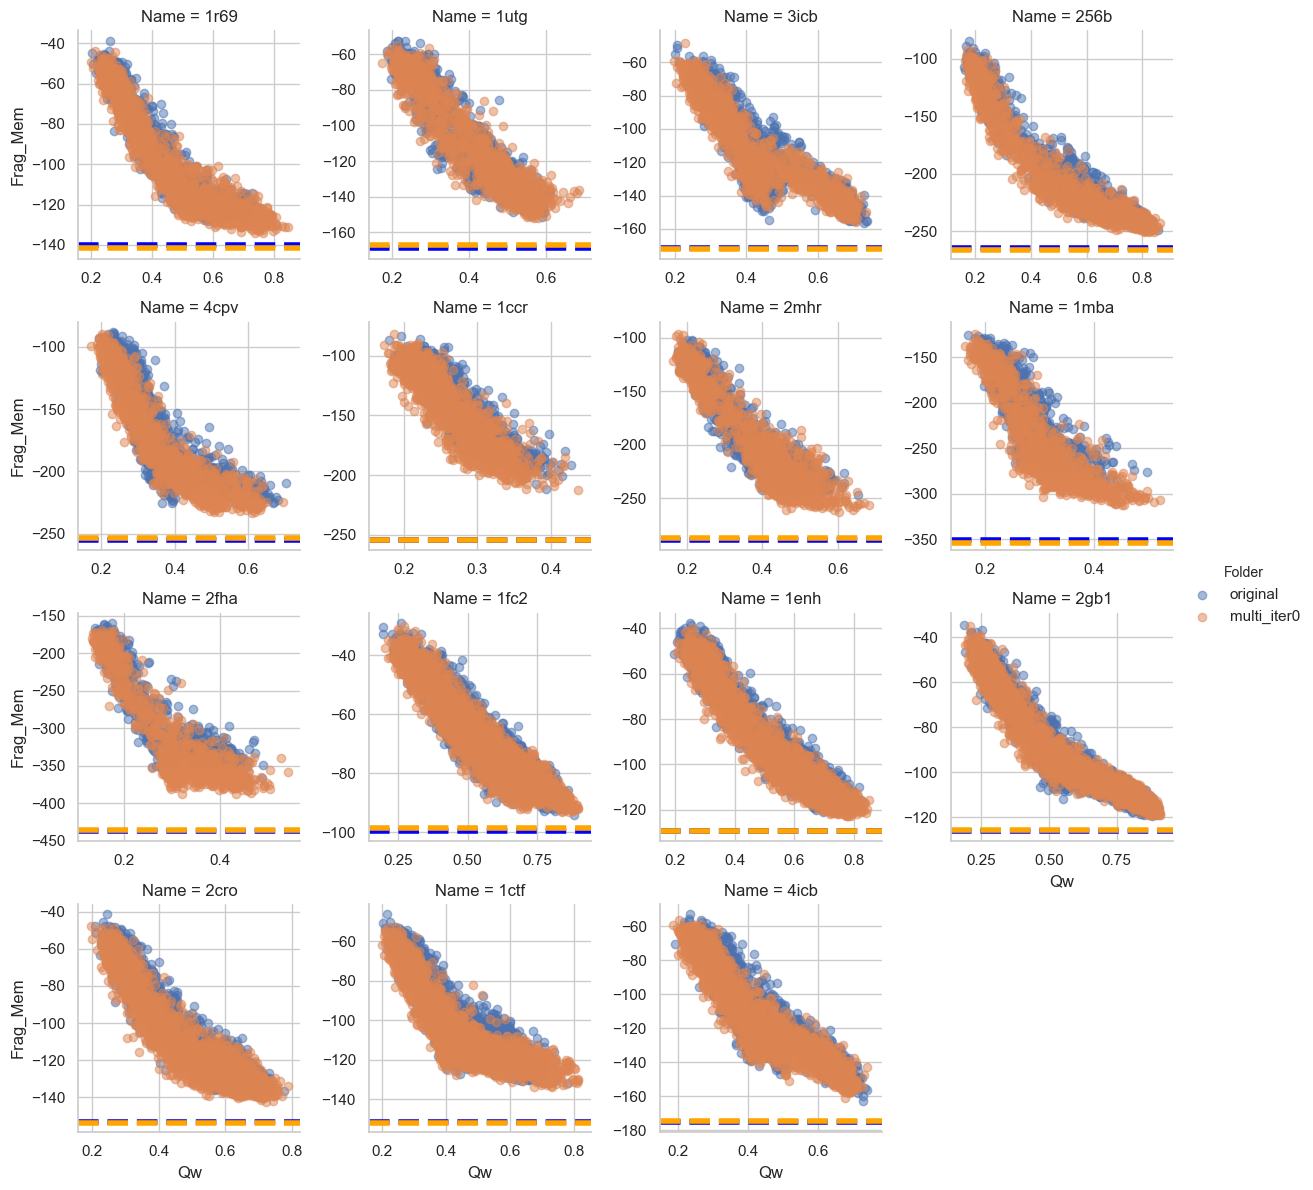

In [36]:
y_show = "Frag_Mem"
g = sns.FacetGrid(subset_data, col="Name",col_wrap=4,  hue="Folder", sharey=False, sharex=False)
g = (g.map(plt.scatter, "Qw", y_show, alpha=0.5).add_legend())
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'multi_iter0_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="blue", linewidth=4)
# energy = native_energy.query("Name == 'T0759-D1' and Folder == 'original_with_minimization'")["VTotal"][0]
# g.axes[0].axhline(energy, ls="--", color="orange", linewidth=4)
for ax in g.axes:
    name= ax.title.get_text().split(" ")[-1]
    # print(name)
    energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[0]
    ax.axhline(energy, ls="--", color="blue", linewidth=4)
    energy = native_energy.query(f"Name == '{name}'")[y_show].iloc[1]
    ax.axhline(energy, ls="--", color="orange", linewidth=4)